<a href="https://colab.research.google.com/github/prakashjashnani25/deep-learning-neural-network/blob/main/LogisticRegression_UsingNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression Using Neural Network


*   Usage Of Vectorization
*   Calculating Cost Function

*   Calculating Gradint and usage of optimization algorithm GD








In [1]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt

Make Sure Copy .h5 file "train*" and "test*" from git hub and uploaded to collobartaive / local environment.

In [23]:
import numpy as np
import h5py
    
    
def load_dataset():
    train_dataset = h5py.File('/content/sample_data/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('/content/sample_data/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [22]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [37]:
#Shape , Size of the data 
type(train_set_x_orig), train_set_x_orig.shape, test_set_x_orig.shape
m_train = train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
num_px=train_set_x_orig.shape[1]
m_train,m_test,num_px

(209, 50, 64)

In [38]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


y = [1], it's a 'cat' picture.


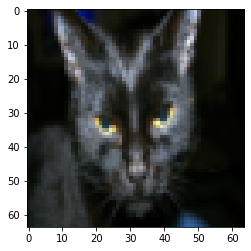

In [27]:
# Example of a picture
index = 25
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

# Reshaping the training and test example ( Flatten to numpy array)

In [41]:
X_flatten=train_set_x_orig.reshape(num_px*num_px*3,m_train)
y_flatten=test_set_x_orig.reshape(num_px*num_px*3,m_test)


In [42]:
#Normalization ( Normalizing pixel values to 0 to 1 )
X=X_flatten/255
y=y_flatten/255

Proble Statement here is to distuniguish between cat and non cat images using Logistic regression

In [47]:
#Helper Function ( sigmoid Activation)
def sigmoid(z):
  # sigmoid(z) = 1/ (1+e pow -z) , e = np.exp()
  return 1 / (1 + np.exp(-z))

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))
x = np.array([0.5, 0, 2.0])
output = sigmoid(x)
print(output)

sigmoid([0, 2]) = [0.5        0.88079708]
[0.62245933 0.5        0.88079708]


Initializing Parameters

In [50]:
def init_with_zeros(dim):
  w = np.zeros((dim,1),dtype=float)#weight matrix
  b = 0.0#bias
  return w,b
#Test
dim=2
w,b=init_with_zeros(dim)
w,b

(array([[0.],
        [0.]]), 0.0)

Forward and Backward Propagation

In [51]:
'''
  Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
'''
def propagate(w,b,X,y):
  m = X.shape[1]#Number of samples
  #Forward Prop
      # operation performed on each nuron ==> wX+b -> 
      # apply a activation function
      # Calculate Cost ( Use Logistic Cost functions)
  z = np.dot(w.T, X)+b
  A=sigmoid(z)
  cost = np.sum(((- np.log(A))*y + (-np.log(1-A))*(1-y)))/m
  #Backward Prop
    # Calculate Loss 
  dw = (np.dot(X,(A-y).T))/m
  db = (np.sum(A-y))/m
  
  cost = np.squeeze(np.array(cost))

    
  grads = {"dw": dw,
             "db": db}
    
  return grads, cost


In [52]:
w =  np.array([[1.], [2]])
b = 1.5
X = np.array([[1., -2., -1.], [3., 0.5, -3.2]])
Y = np.array([[1, 1, 0]])
grads, cost = propagate(w, b, X, Y)

Optimization

In [66]:
"""
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
"""
def optimize(w,b,X,y,num_iterations=100,learning_rate=0.01):
  # w=np
  # b=np.copy
  costs=[]
  for i in range(num_iterations):
    grad,cost=propagate(w,b,X,y)
    # print(f"grad {grad}")
    dw=grad["dw"]
    db=grad["db"]
    w   = w - learning_rate*dw
    b= b - learning_rate*db
    if i % 100 == 0:
      costs.append(cost)
      print(f"cost after interation {i} {cost}")
    
  params={"w":w,"b":b} # Final Value of Parameters , w and b afater num_ir=terations
  grads={"dw":dw,"db":db} 
  return params,grads,costs

In [67]:
params, grads, costs = optimize(w, b, X, Y, num_iterations=100, learning_rate=0.009)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print("Costs = " + str(costs))

grad {'dw': array([[ 0.25071532],
       [-0.06604096]]), 'db': -0.12500404500439652}
cost after interation 0 0.15900537707692405
w = [[0.99774356]
 [2.00059437]]
b = 1.5011250364050395
dw = [[ 0.25071532]
 [-0.06604096]]
db = -0.12500404500439652
Costs = [array(0.15900538)]


Prediction

In [74]:
'''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
'''
def predict(w,b,X):
  m = X.shape[1]
  y=np.zeros((X.shape[0],m))
  w = w.reshape(X.shape[0],1)
  #Compute A
  A=sigmoid(np.dot(w.T,X)+b)
  for i in range(A.shape[-1]):
    y[0,i]=1 if A[0,i]>=0.5 else 0
  return y

In [75]:
w = np.array([[0.1124579], [0.23106775]])
b = -0.3
X = np.array([[1., -1.1, -3.2],[1.2, 2., 0.1]])
print ("predictions = " + str(predict(w, b, X)))


predictions = [[1. 1. 0.]
 [0. 0. 0.]]


In [78]:
def model(X_train,Y_train, X_test, Y_test, num_iterations=100, learning_rate=0.01):
  w,b = init_with_zeros(X_train.shape[0])
  params, grad, costs=optimize(w,b,X_train,Y_train,10)
  w,b = params["w"], params["b"]
  Y_pred_test=predict(w,b,X_test)
  Y_pred_train=predict(w,b,X_train)
  # Print train/test Errors
  if True:
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
  d = {"costs": costs,"Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
  return d

In [79]:
logistic_regression_model = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=2000, learning_rate=0.005, print_cost=True)

NameError: ignored

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(logistic_regression_model['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(logistic_regression_model["learning_rate"]))
plt.show()

In [ ]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for lr in learning_rates:
    print ("Training a model with learning rate: " + str(lr))
    models[str(lr)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1500, learning_rate=lr, print_cost=False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for lr in learning_rates:
    plt.plot(np.squeeze(models[str(lr)]["costs"]), label=str(models[str(lr)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()